# Linear Regression ( from scratch )

## Libraries

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import random

## Data

In [27]:
def get_column(data, index):
    return [row[index] for row in data]

In [28]:
def prepare_data(file_name_dataset):
    data = np.genfromtxt(file_name_dataset, delimiter=',', skip_header=1).tolist()
    
    # Get tv (index = 0)
    tv_data = get_column(data, 0)
    
    # Get radio (index = 1)
    radio_data = get_column(data, 1)
    
    # Get newspaper (index = 2)
    newspaper_data = get_column(data, 2)
    
    # Get sales (index = 3)
    sales_data = get_column(data, 3)
    
    # Building X input and y output for training
    X = [tv_data, radio_data, newspaper_data]
    y = sales_data
    
    return X, y

In [29]:
X, y = prepare_data('data/Advertising.csv')
lst = [sum(X[0][:5]), sum(X[1][:5]), sum(X[2][:5]), sum(y[:5])]
print(lst)

[624.1, 175.10000000000002, 300.5, 78.9]


## Model

### Initialize parameters

In [ ]:
def initialize_parameters():
    w1 = random.gauss(mu=0.0, sigma=0.01)
    w2 = random.gauss(mu=0.0, sigma=0.01)
    w3 = random.gauss(mu=0.0, sigma=0.01)
    b = 0
    return w1, w2, w3, b

In [23]:
def initialize_parameters():
    w1, w2, w3, b = (0.016992259082509283, 0.0070783670518262355, -0.002307860847821344, 0)
    return w1, w2, w3, b

### Prediction

In [10]:
def predict(x1, x2, x3, w1, w2, w3, b):
    return w1*x1 + w2*x2 + w3*x3 + b

In [11]:
y = predict(1, 1, 1, 0, 0.5, 0, 0.5)
print(y)

1.0


### Loss function

In [63]:
def compute_loss_mse(y_hat, y):
    return (y_hat - y)**2

In [64]:
def compute_loss_mae(y_hat, y):
    return abs(y_hat - y)

In [65]:
l = compute_loss_mse(1, 0.5)
print(l)

0.25


In [66]:
l = compute_loss_mae(1, 0.5)
print(l)

0.5


### Gradient

In [34]:
def compute_gradient_wi(xi, y, y_hat):
    return 2*xi*(y_hat - y)

def compute_gradient_b(y, y_hat):
    return 2*(y_hat - y)

In [35]:
# MSE loss
g_wi = compute_gradient_wi(1, 1, 0.5)
print(g_wi)

-1.0


In [36]:
g_b = compute_gradient_b(2, 0.5)
print(g_b)

-3.0


### Update parameters

In [37]:
def update_weight_wi(wi, grad_wi, learning_rate):
    return wi - learning_rate*grad_wi

def update_weight_b(b, grad_b, learning_rate):
    return b - learning_rate*grad_b

In [38]:
after_wi = update_weight_wi(1, -0.5, 1e-5)
print(after_wi)

1.000005


In [39]:
after_b = update_weight_b(0.5, -1.0, 1e-5)
print(after_b)

0.50001


### Implementing the model

In [73]:
def implement_linear_regression(X_data, y_data, epoch_max=50, lr=1e-5):
    losses = []
    
    w1, w2, w3, b = initialize_parameters()
    
    N = len(y_data)
    for epoch in range(epoch_max):
        
        loss_total = 0.0
        dw1_total = 0.0
        dw2_total = 0.0
        dw3_total = 0.0
        db_total = 0.0
        
        for i in range(N):
            x1, x2, x3 = X_data[0][i], X_data[1][i], X_data[2][i]
            y = y_data[i]
            
            # Forward pass
            y_hat = predict(x1, x2, x3, w1, w2, w3, b)
            
            # Compute loss
            loss = compute_loss_mse(y_hat, y)
            
            # Compute gradients
            grad_w1 = compute_gradient_wi(x1, y, y_hat)
            grad_w2 = compute_gradient_wi(x2, y, y_hat)
            grad_w3 = compute_gradient_wi(x3, y, y_hat)
            grad_b = compute_gradient_b(y, y_hat)
            
            # Accumulate gradient
            dw1_total += grad_w1
            dw2_total += grad_w2
            dw3_total += grad_w3
            db_total += grad_b
            
            # Accumulate loss
            loss_total += loss
            
        # Update parameters
        w1 = update_weight_wi(w1, dw1_total/N, lr)
        w2 = update_weight_wi(w2, dw2_total/N, lr)
        w3 = update_weight_wi(w3, dw3_total/N, lr)
        b = update_weight_b(b, db_total/N, lr)
            
            
        losses.append(loss_total/N)
            
    return w1, w2, w3, b, losses

## Train

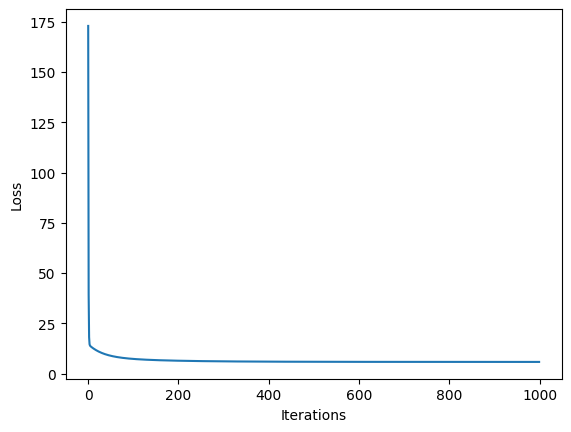

In [74]:
(w1, w2, w3, b, losses) = implement_linear_regression(X, y, epoch_max=1000)

plt.plot(losses)
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.show()

In [75]:
print(w1, w2, w3)

0.06710990754044266 0.15756173831487585 0.029619799386084403


In [71]:
(w1, w2, w3, b, losses) = implement_linear_regression(X, y)
print(w1, w2, w3)

0.0777391352775665 0.05644769904625777 0.04135488482198375


In [55]:
tv = 19.2
radio = 35.9
newspaper = 51.3

(w1, w2, w3, b, losses) = implement_linear_regression(X, y, epoch_max=50, lr=1e-5)

sales = predict(tv, radio, newspaper, w1, w2, w3, b)
print(f'predicted sales is {sales}')

predicted sales is 8.176413319549823
